In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import pandas as pd
data = pd.read_csv('kc_house_data.csv', sep = "," , parse_dates=['date'])

In [25]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
data.shape

(21613, 21)

In [27]:
data = data.assign(day=data.date.dt.day,
                   month=data.date.dt.month,
                   year=data.date.dt.year
                   )

In [28]:
data.drop("date",axis=1,inplace=True)


In [29]:
data.drop("id",axis=1,inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [31]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,15.688197,6.574423,2014.322954
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,8.635063,3.115308,0.467616
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.000000,2014.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,8.000000,4.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,16.000000,6.000000,2014.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,23.000000,9.000000,2015.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,31.000000,12.000000,2015.000000


In [32]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
day              0
month            0
year             0
dtype: int64

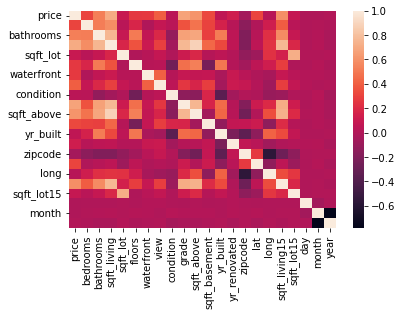

In [33]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix)
plt.show()

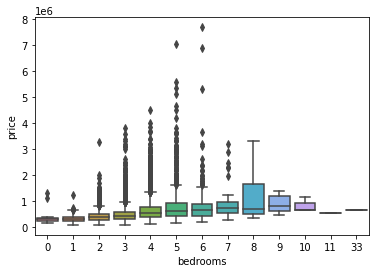

In [35]:
ax = sns.boxplot(x="bedrooms", y="price", data=data)

In [36]:
y=data['price'].values
X=data.drop('price',axis=1).values

In [38]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,13,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,25,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,9,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,18,2,2015


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
print (lm.intercept_)
print (lm.coef_)

-72215250.37364073
[-3.49867325e+04  3.95215677e+04  1.12842729e+02  1.72527065e-01
  7.92127829e+03  6.06347333e+05  5.24654105e+04  2.76776546e+04
  9.37668091e+04  7.28627756e+01  3.99799537e+01 -2.60180160e+03
  2.12522081e+01 -5.69545139e+02  6.07135196e+05 -2.22027597e+05
  2.42620709e+01 -4.66538959e-01 -3.70677010e+02  1.35609801e+03
  3.79784568e+04]


In [42]:
y_pred=lm.predict(X_test)

In [44]:
lm.score(X_test,y_test)

0.6963388348526975

In [45]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)

In [46]:
mse

36112682178.91191

In [47]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=10, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [48]:
model.score(X_test,y_test)

0.6968503182934735

In [49]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
ls.fit(X_train, y_train)

test_pred = ls.predict(X_test)
train_pred = ls.predict(X_train)


In [50]:
ls.score(X_test,y_test)

0.6621246809108033